# Regression Assumption Examples
**Further Reading:** §7.4 in Navidi (2015), *Checking Assumptions and Transforming Data*


## Learning Objectives

After studying this notebook and your lecture notes, you should be able to:
* Check linear regression error assumptions using residual analysis (plots)
* Recognize data that violate the linear regression error assumptions and understand next steps

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt 

## Assumptions
Recall the following assumptions for linear regression error:

1. The errors $\epsilon_1$, ..., $\epsilon_n$ are **random and independent**. Thus the magnitude of any error $\epsilon_i$ does not impact the magnitude of error $\epsilon_{i+1}$.
2. The errors $\epsilon_1$, ..., $\epsilon_n$ all have **mean zero**.
3. The errors $\epsilon_1$, ..., $\epsilon_n$ all have the **same variance**, denoted $\sigma^2$.
4. The errors $\epsilon_1$, ..., $\epsilon_n$ are **normally distributed**.

Below, we will look at a few examples of data that violate these assumptions and discuss what to do in those cases.

## Example 1
*Following Example 7.20 in Navidi*

Below is a plot of atmospheric ozone concentrations versus $NO_x$ concentrations measured on 359 days in a recent year near Riverside, California.  This is a **heteroscedastic** plot, meaning the vertical spread varies greatly with the fitted value (i.e. residuals).

These two plots were generated by pieceing together segments of normally distributed data around a line created with a lambda function (indicated in green, the best fit line) to demonstrate the trend.

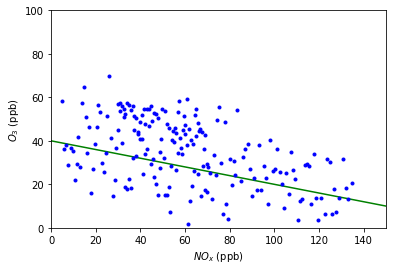

In [3]:
nsim = 100

xline1 = np.linspace(0,150,nsim)
y1 = lambda x: -0.2*x + 40
yline1 = y1(xline1)

x1 = np.linspace(5,85,nsim)
var1 = np.random.normal(5,17,nsim)
y1 = yline1 + var1

xline2 = np.linspace(0,100,50)
y2 = lambda x: -0.2*x + 40
yline2 = y2(xline2)

x2 = np.linspace(85,135,50)
var2 = np.random.normal(-10,10,50)
y2 = yline2 + var2

xline3 = np.linspace(0,100,50)
y3 = lambda x: -0.2*x + 40
yline3 = y3(xline3)

x3 = np.linspace(30,70,50)
var3 = np.random.normal(15,8,50)
y3 = yline2 + var3

plt.plot(xline1,yline1,'g')
plt.plot(x1,y1,'bo',markersize=3)
plt.plot(x2,y2,'bo',markersize=3)
plt.plot(x3,y3,'bo',markersize=3)
plt.xlabel('$NO_x$ (ppb)')
plt.ylabel('$O_3$ (ppb)')
plt.xlim([0,150])
plt.ylim([0,100])
plt.show()

Above is a plot of ozone concentration versus $NO_x$ concentration.  The least squares line is sumperimposed.

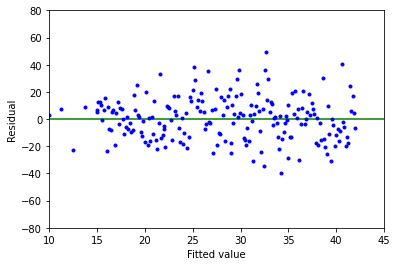

In [4]:
nsim=50

xline = np.linspace(0,100,nsim)
yline = np.zeros(nsim)

x1 = np.linspace(10,15,5)
y1 = np.random.normal(0,12,5)

x2 = np.linspace(15,22,nsim)
y2 = np.random.normal(0,11,nsim)

x3 = np.linspace(22,29,nsim)
y3 = np.random.normal(0,16,nsim)

x4 = np.linspace(29,35,nsim)
y4 = np.random.normal(0,22,nsim)

x5 = np.linspace(35,42,nsim)
y5 = np.random.normal(0,17,nsim)

plt.plot(xline,yline,'g')
plt.plot(x1,y1,'bo',markersize=3)
plt.plot(x2,y2,'bo',markersize=3)
plt.plot(x3,y3,'bo',markersize=3)
plt.plot(x4,y4,'bo',markersize=3)
plt.plot(x5,y5,'bo',markersize=3)
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.xlim([10,45])
plt.ylim([-80,80])
plt.show()

Above is a plot of residuals ($\varepsilon _i$) versus fitted values ($\hat{\gamma _i}$) for these data.

In this example, notice how the vertical spread increases with the fitted value. This indicates that the assumption of **constant error variance** (assumption #3) is violated, therefore we should not use the linear model in this case.

## Example 2
*Following Example 7.21 in Navidi*

A weld's physical properties are influenced by the weld material chemical composition.  The Ogden-Jaffe number is one measure of the chemical composition which is a weighted sum of the percentages of carbon, oxygen, and nitrogen in the weld.

These two plots were generated by pieceing together segments of normally distributed data around a line created with a lambda function (indicated in green, the best fit line) to demonstrate the trend.

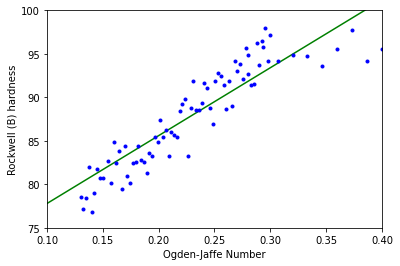

In [5]:
nsim = 70

xline1 = np.linspace(0,0.4,nsim)
yfunc1 = lambda x: 78*x + 70
yline1 = yfunc1(xline1)

xline2 = np.linspace(0.13,0.3,nsim)
yfunc2 = lambda x: 110*x + 63
yline2 = yfunc2(xline2)

x2 = np.linspace(0.13,0.3,nsim)
var2 = np.random.normal(0,2,nsim)
y2 = yline2 + var2

x3 = np.linspace(0.28,0.4,10)
y3 = np.random.normal(95,1,10)

plt.plot(xline1,yline1,'g')
plt.plot(x2,y2,'bo',markersize=3)
plt.plot(x3,y3,'bo',markersize=3)
plt.xlabel('Ogden-Jaffe Number')
plt.ylabel('Rockwell (B) hardness')
plt.xlim([0.1,0.4])
plt.ylim([75,100])
plt.show()

Above is a plot of Rockwell (B) hardness versus Ogden-Jaffe number. The least-squares line is superimposed.

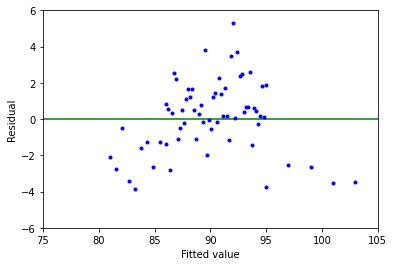

In [6]:
nsim=50

xline = np.linspace(0,105,nsim)
yline = np.zeros(nsim)

x1 = np.linspace(81,86,10)
y1 = np.random.normal(-2,1.5,10)

x2 = np.linspace(86,95,nsim)
y2 = np.random.normal(1,1.5,nsim)

x3 = np.linspace(95,103,5)
y3 = np.random.normal(-3,0.8,5)

plt.plot(xline,yline,'g')
plt.plot(x1,y1,'bo',markersize=3)
plt.plot(x2,y2,'bo',markersize=3)
plt.plot(x3,y3,'bo',markersize=3)
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.xlim([75,105])
plt.ylim([-6,6])
plt.show()

Above is a plot of residuals ($\varepsilon _i$) versus fitted values ($\hat{\gamma _i}$) for these data.

This example demonstrates a residual trend with the middle having positive residuals and the ends having negative residuals. This violates the assumption that the **errors $\varepsilon _i$ don't all have a mean of 0**, therefore we shouln't use the linear model in this case.

This is typical when the relationship between variables is nonlinear or there are missing variables in the model.

## Example 3
*Following Example 7.22 in Navidi*

For a group of 255 gas wells, the monthly production per foot depth of the well is plotted against the fracture fluid pumped into it.  This plot is also **heteroscedastic**.

These two plots were generated by pieceing together segments of normally distributed data around a line created with a lambda function (indicated in green, the best fit line) to demonstrate the trend.

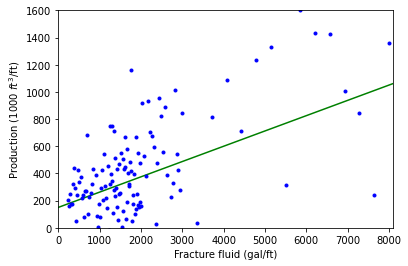

In [7]:
nsim = 70

xline1 = np.linspace(0,8100,nsim)
y = lambda x: 0.1125*x + 150
yline1 = y(xline1)


x1 = np.linspace(200,2000,nsim)
y1 = np.random.normal(250,150,nsim)
#y1 = yline1 + var1


x2 = np.linspace(1200,3000,40)
y2 = np.random.normal(550,300,40)

x3 = np.linspace(3000,8000,15)
y3 = np.random.normal(800,500,15) 

plt.plot(xline1,yline1,'g')
plt.plot(x1,y1,'bo',markersize=3)
plt.plot(x2,y2,'bo',markersize=3)
plt.plot(x3,y3,'bo',markersize=3)
plt.xlabel('Fracture fluid (gal/ft)')
plt.ylabel('Production (1000 $ft^3$/ft)')
plt.xlim([0,8100])
plt.ylim([0,1600])
plt.show()

Above is a plot of mothly production volume of fracture fluid for 255 gas wells.  The least-squares line is superimposed.

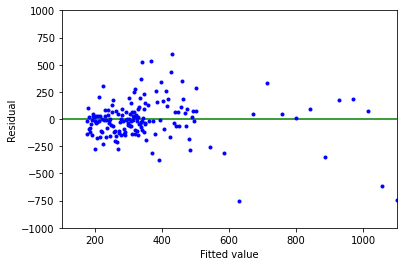

In [8]:
nsim=100

xline = np.linspace(100,1100,nsim)
yline = np.zeros(nsim)

x1 = np.linspace(175,350,nsim)
y1 = np.random.normal(-25,100,nsim)

x2 = np.linspace(300,500,50)
y2 = np.random.normal(100,250,50)

x3 = np.linspace(500,1100,15)
y3 = np.random.normal(0,400,15)

plt.plot(xline,yline,'g')
plt.plot(x1,y1,'bo',markersize=3)
plt.plot(x2,y2,'bo',markersize=3)
plt.plot(x3,y3,'bo',markersize=3)
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.xlim([100,1100])
plt.ylim([-1000,1000])
plt.show()

Above is a plot of residuals ($\varepsilon _i$) versus fitted values ($\hat{\gamma _i}$) for these data.

As with Example 1, we see that the vertical spread increases with fitted value, so this is another violation of the **constant error variance** assumption (#3). Again, a linear model would not properly represent these data.